In [1]:
from aerobot.dataset import dataset_load
from aerobot.plot import *
# from aerobot.utils import print_taxonomy_info
from aerobot.io import load_results_dict, RESULTS_PATH, DATA_PATH
import numpy as np
from aerobot.io import DATA_PATH, load_hdf
from aerobot.dataset import dataset_load
import os
from matplotlib.gridspec import GridSpec
import pandas as pd 
import subprocess
from typing import Dict

%load_ext autoreload
%autoreload 2

plot_configure_mpl()

In [9]:
# NOTE: Should I plot the training and validation sets differently? Or just total labels?
madin_labels_df = pd.read_hdf(os.path.join(DATA_PATH, 'madin', 'madin.h5'), key='labels')[['OXYGEN_REQUIREMENT']] # Only stuff like microaerophilic here... Not in physiology column.
jablonska_labels_df = pd.read_csv(os.path.join(DATA_PATH, 'jablonska', 'jablonska_labels.csv'), index_col=0)[['Oxygen requirement']]

print('Labels in Jablonska dataset:', set(jablonska_labels_df['Oxygen requirement']))
print('Labels in Madin dataset:', set(madin_labels_df['OXYGEN_REQUIREMENT']))
print()

# Merge the dataset labels. 
labels_df = madin_labels_df.merge(jablonska_labels_df, how='outer', left_index=True, right_index=True)
labels_df.index = [id_.split('.')[0] for id_ in labels_df.index]
labels_df = labels_df[~labels_df.index.duplicated()]
labels_df['label'] = labels_df[['OXYGEN_REQUIREMENT']].fillna(labels_df['Oxygen requirement'])

labels_counts_df = labels_df['label'].value_counts()

for label in labels_counts_df.index:
    print(f'Number of {label} in data:', labels_counts_df.loc[label].item())

Labels in Jablonska dataset: {'Facultative', 'Aerobic', 'Anaerobic'}
Labels in Madin dataset: {'Obligate anaerobe', 'Obligate aerobe', 'Facultative', 'Anaerobe', 'Microaerophilic', 'Aerobe', 'Facultative anaerobe'}

Number of Aerobe in data: 1499
Number of Anaerobe in data: 1019
Number of Facultative in data: 380
Number of Obligate anaerobe in data: 127
Number of Microaerophilic in data: 119
Number of Obligate aerobe in data: 57
Number of Facultative anaerobe in data: 7


# SI Figure 8

In [41]:
def plot_si_figure_8(labels_counts_df:pd.DataFrame, grid:GridSpec=None, fig:plt.Figure=None) -> plt.Axes:
    '''Plot a stacked bar plot showing the distribution of metabolic labels in the training and validation datasets.'''

    ax = fig.add_subplot(grid)
    ax.set_title('Dataset composition')

    labels = list(labels_counts_df.index)

    kwargs = {'edgecolor':'k', 'lw':0.5, 'facecolor':plot_color_palette()['blue']}
    ax.bar(np.arange(len(labels)), labels_counts_df.values, **kwargs)

    ax.set_xticks(np.arange(len(labels)), labels=labels)
    ax.set_ylabel('count')
    ax.set_ylim(0, max(labels_counts_df.values) + 200)
    ax.set_xlabel('original label')

    for bar, val in zip(ax.patches, labels_counts_df.values):
        ax.annotate(str(val), xy=(bar.get_x() + 0.33, bar.get_height() + 50))

    return ax



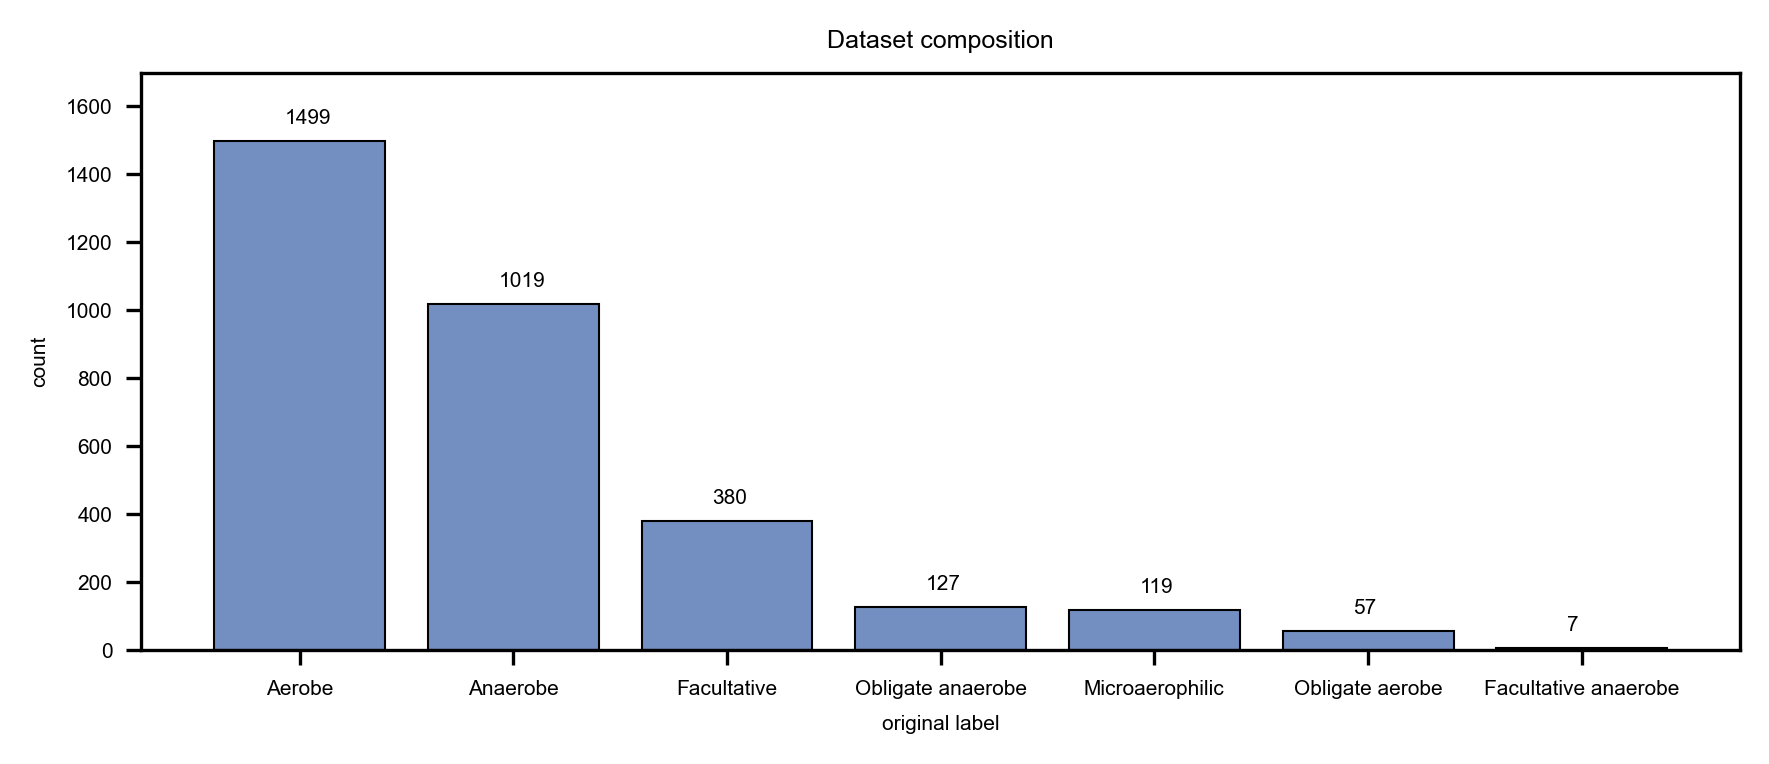

In [42]:
fig = plt.figure()
grid = GridSpec(1, 1, wspace=0.2) 
plot_si_figure_8(labels_counts_df, grid=grid[0, 0], fig=fig)

plt.show()